In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA1D112DC8>]],
      dtype=object)

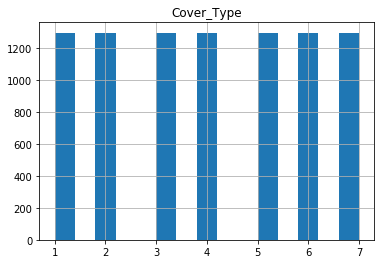

In [13]:
# Code starts here
train= pd.read_csv('train.csv')
X = train.drop(['Id'], axis=1)
X = X[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type17', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40','Cover_Type']]

train.isnull().sum()

train.describe()
X.shape
X.head()

X.hist(column='Cover_Type', bins=15)

In [4]:
X = X[X['Horizontal_Distance_To_Hydrology']<=700]
X = X[X['Vertical_Distance_To_Hydrology']<=180]
X = X[X['Horizontal_Distance_To_Roadways']<=3800]
X = X[X['Hillshade_9am']>=140]
X = X[X['Hillshade_Noon']>=160]
X = X[X['Horizontal_Distance_To_Fire_Points']<=3400]

XX = X
yy = X
XX.shape
A= XX.drop('Cover_Type',axis=1)
a= yy['Cover_Type']

A.shape

(6945, 33)

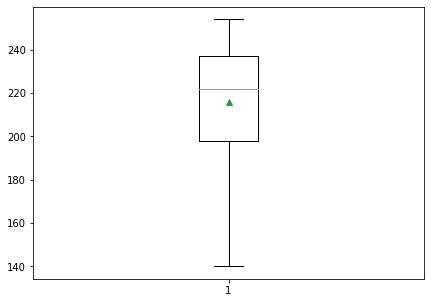

(6945, 34)

In [5]:
plt.figure(figsize=(7,5))
plt.boxplot(XX['Hillshade_9am'],showmeans=True)
plt.show()
XX.shape

#tuned_parameters = {'estimator__C': [0.1, 1, 10, 100, 1000]}  #parameters used for one vs rest classifier used with gridsearchCV


#model=OneVsRestClassifier(SVC())
#loggrid = GridSearchCV(model, tuned_parameters)

some important tips on how to select best feature and their names:
from sklearn.feature_selection import RFE    

rf = RandomForestClassifier(random_state=43)   

rfe = RFE(estimator=rf, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

from sklearn.feature_selection import RFECV

#The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator=rf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation

rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])


In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

tuned_parameters = {'min_samples_leaf': range(1, 5, 2),
              'max_features': range(1, 6, 2),
              'n_estimators': range(50, 250, 50)
    
}
X_train,X_test,y_train,y_test=train_test_split(A,a ,test_size=0.2,random_state=9)
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=4)
loggrid = GridSearchCV(model, tuned_parameters)

loggrid.fit(X_train_scaled,y_train)
pre = loggrid.predict(X_test_scaled)
accuracy_score(pre, y_test)

0.8466522678185745

              precision    recall  f1-score   support

           1       0.77      0.66      0.71       148
           2       0.82      0.69      0.75       167
           3       0.82      0.77      0.79       213
           4       0.90      0.97      0.93       242
           5       0.87      0.95      0.91       212
           6       0.82      0.84      0.83       227
           7       0.88      0.96      0.92       180

    accuracy                           0.85      1389
   macro avg       0.84      0.83      0.83      1389
weighted avg       0.84      0.85      0.84      1389



array([[ 98,  23,   0,   0,   0,   0,   7],
       [ 19, 116,   0,   0,   2,   4,   0],
       [  0,   7, 163,   4,   4,  21,   0],
       [  0,   0,  18, 234,   0,   8,   0],
       [  6,  19,   2,   0, 201,   3,   0],
       [  1,   2,  30,   4,   5, 191,   0],
       [ 24,   0,   0,   0,   0,   0, 173]], dtype=int64)

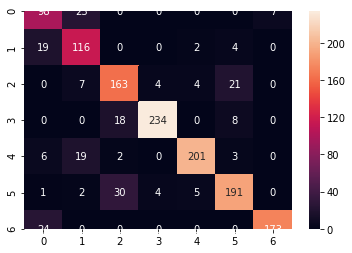

In [27]:
cm = confusion_matrix(pre, y_test, labels=[1,2,3,4,5,6,7])
cm
sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test, pre))
cm

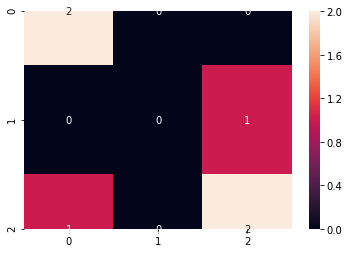

In [32]:
# y_true = [2, 0, 2, 2, 0, 1]
# y_pred = [0, 0, 2, 2, 0, 2]

y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
cm= confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
sns.heatmap(cm,annot=True,fmt="d")
# array([[2, 0, 0],
#        [0, 0, 1],
#        [1, 0, 2]])